In [22]:
include("cutoff.jl")

hitting_time_pr (generic function with 2 methods)

21/100 paths did not converge to 0 within 2 steps.


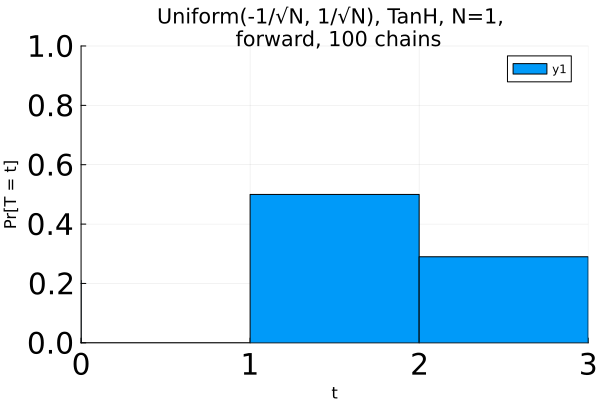

In [15]:
# for N = 1:12
N = 1
X₀_Dist = Uniform(-1, 1)

num_chains = 100
# Dist = Uniform(-1/√N, 1/√N)
WeightDist = Uniform(-1, 1)
# Dist = Normal(0.0, 1)
# Dist = Normal(0.0, 1/√N)
# activation = σ
activation = tanh
step_size = 0.4
eps = step_size/2
num_steps = 2
forward = true
store_steps = false

Exp = Experiment(X₀_Dist, N, num_chains, WeightDist, activation, step_size, num_steps, forward, store_steps)
times, hist = hitting_times(Exp)


diststr_greek, diststr_nongreek, actstr, dynamicsstr = get_plotting_strs(Exp)
p = plot(hist,
    title="$diststr_greek, $actstr, N=$N, \n $dynamicsstr, $num_chains chains",
    xlabel="t",
    ylabel="Pr[T = t]",
    fontsize=30,
    tickfontsize=20,
    xlim=(0, num_steps+1),
    ylim=(0, 1),
)
display(p)
# savefig(p, "imgs/hitting_times/hitting_times $diststr_nongreek $actstr $dynamicsstr N=$N.png")
# end

In [16]:
println_hist(hist)

Pr[T=0]: 0.0
Pr[T=1]: 0.5
Pr[T=2]: 0.29


In [23]:
hitting_time_pr(N, 1, eps)

LoadError: UndefVarError: ≂̸ not defined

In [ ]:
""" The below function is almost certainly wrong.
"""

function analytical_pr(N, eps)
    Z = Normal(0, 1)
    sd = sqrt(1/9)
    
    (2 * cdf(Z, atanh(eps) * sd * sqrt(N)) - 1)^N
end

analytical_pr(N, eps)